In [1]:
import numpy as np
import pandas as pd

# 读取数据
data = pd.read_csv('household_power_consumption.csv', sep=";")
# 查看数据
data.head()

D:\software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
# 只取 'Global_active_power','Global_intensity' 列进行建模训练
data = data[['Global_active_power', 'Global_intensity']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Global_active_power  object
 1   Global_intensity     object
dtypes: object(2)
memory usage: 31.7+ MB


In [3]:
data[data['Global_active_power']=='?']

,Global_active_power,Global_intensity
6839,?,?
6840,?,?
19724,?,?
19725,?,?
41832,?,?
...,...,...
1990185,?,?
1990186,?,?
1990187,?,?
1990188,?,?


In [4]:
data[data['Global_intensity']=='?']

,Global_active_power,Global_intensity
6839,?,?
6840,?,?
19724,?,?
19725,?,?
41832,?,?
...,...,...
1990185,?,?
1990186,?,?
1990187,?,?
1990188,?,?


In [5]:
data['Global_active_power'].replace('?', np.nan, inplace=True)
data['Global_intensity'].replace('?', np.nan, inplace=True)
data[data['Global_active_power']=='?']

,Global_active_power,Global_intensity


In [6]:
data[data['Global_intensity']=='?']

,Global_active_power,Global_intensity


In [7]:
data.shape

(2075259, 2)

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(2049280, 2)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(data['Global_active_power'], dtype='float32').reshape(-1,1)
y = np.array(data['Global_intensity'], dtype='float32')
# 分割训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

# 输出权重和截距
print('权重:',lr.coef_)
print('截距:',lr.intercept_)
# 得出模型函数,用测试集测试模型的拟合程度
y_hat = lr.predict(x_test)

权重: [4.198938]
截距: 0.04417658


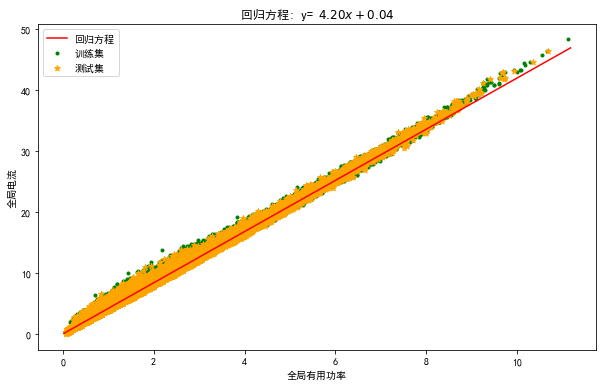

In [12]:
# 可视化
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'

# 设置画布
plt.figure(figsize = (10,6))
# 绘制训练集和测试集图像
plt.scatter(x_train, y_train, c = 'g', marker = '.',label = '训练集')
plt.scatter(x_test, y_test, c = 'orange', marker= '*', label = '测试集')

x = np.linspace(x_train.min()-0.05, x_train.max() + 0.05, 100)
y_hat = lr.coef_ * x + lr.intercept_

# 绘制回归方程直线
plt.plot(x, y_hat, 'r-', label = '回归方程')
plt.legend()
plt.xlabel('全局有用功率')
plt.ylabel('全局电流')
plt.title(f'回归方程: y= ${lr.coef_[0]:.2f}x + {lr.intercept_:.2f}$')
plt.show()